<a href="https://colab.research.google.com/github/0112leesy/MachineLearning-DryBeanClassification/blob/main/DryBeanClassification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Dry_Bean = pd.read_csv('/content/drive/My Drive/Machine Learning/Dry_Bean_Dataset.csv')
Dry_Bean_df = pd.DataFrame(data=Dry_Bean, columns=Dry_Bean.columns)
Dry_Bean_df # 데이터프레임 생성

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
Dry_Bean_df.info()  # 데이터프레임 info -> 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

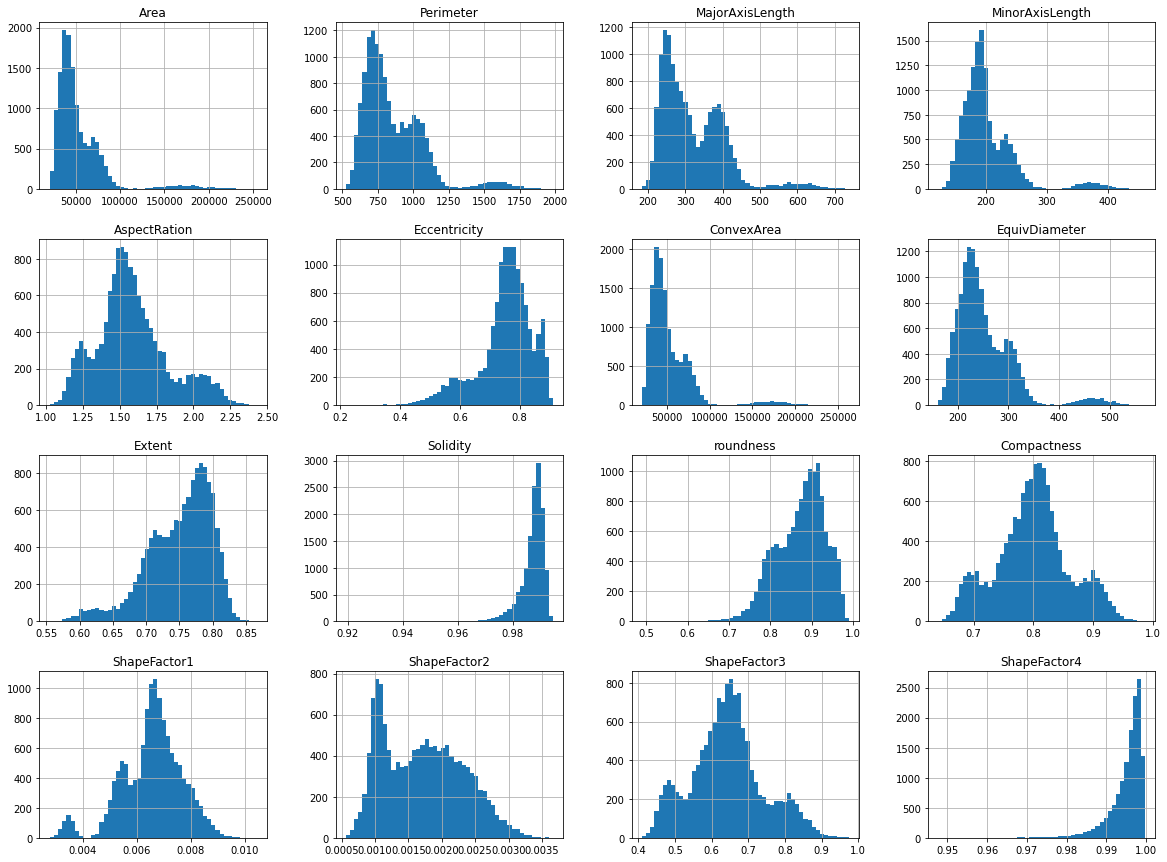

In [ ]:
Dry_Bean_df.hist(bins=50, figsize=(20,15))
plt.show()  # 특성 별 값의 분포

In [ ]:
X = Dry_Bean.iloc[:,0:16]
Y = Dry_Bean.iloc[:,16].replace({'DERMASON':0, 'SIRA':1, 'SEKER':2, 'HOROZ':3,'CALI': 4, 'BARBUNYA':5, 'BOMBAY':6}).copy()

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, cutoff = 0.05):
  initial_features = data.columns.tolist()
  best_features = []
  while (len(initial_features)>0):
    remaining_features = list(set(initial_features)-set(best_features))
    new_pval = pd.Series(index=remaining_features)
    for new_column in remaining_features:
      model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
      new_pval[new_column] = model.pvalues[new_column]
    min_p_value = new_pval.min()
    if (min_p_value<cutoff):
      best_features.append(new_pval.idxmin())
    else:
      break
  return best_features

forwarddata = forward_selection(X,Y,0.01)
print("Forwardselection 결과")
print("================================")
for feature in forwarddata:
  print(feature)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


Forwardselection 결과
MinorAxisLength
AspectRation
Eccentricity
Area
roundness
ShapeFactor2
EquivDiameter
ShapeFactor1
MajorAxisLength
ShapeFactor4
ShapeFactor3
Compactness
ConvexArea
Solidity
Perimeter
Extent


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2020) # 트레인 데이터, 테스트 데이터 분리

In [ ]:
# StandardScaler로 스케일링 후 최적 커널 함수 찾기

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
print("StandardScaler 스케일링 후 최적 커널 함수 찾기")
print("========================================================")

from sklearn import svm
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train,Y_train)
Y_pred_linear = clf_linear.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_linear)
print("linear 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(Y_test,Y_pred_linear))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_linear, target_names=target_names))
print("========================================================")

from sklearn import svm
clf_poly2 = svm.SVC(kernel='poly',degree=2)
clf_poly2.fit(X_train,Y_train)
Y_pred_poly2 = clf_poly2.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_poly2)
print("degree가 2인 poly 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(Y_test,Y_pred_poly2))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_poly2, target_names=target_names))
print("========================================================")

from sklearn import svm
clf_poly3 = svm.SVC(kernel='poly',degree=3)
clf_poly3.fit(X_train,Y_train)
Y_pred_poly3 = clf_poly3.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_poly3)
print("degree가 3인 poly 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(Y_test,Y_pred_poly3))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_poly3, target_names=target_names))
print("========================================================")

from sklearn import svm
clf_poly4 = svm.SVC(kernel='poly',degree=4)
clf_poly4.fit(X_train,Y_train)
Y_pred_poly4 = clf_poly4.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_poly4)
print("degree가 4인 poly 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(Y_test,Y_pred_poly4))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_poly4, target_names=target_names))
print("========================================================")

from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train,Y_train)
Y_pred_rbf = clf_rbf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_rbf)
print("rbf 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(Y_test,Y_pred_rbf))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_rbf, target_names=target_names))
print("========================================================")

StandardScaler 스케일링 후 최적 커널 함수 찾기
linear 커널 오차 행렬:
 [[660  46   8   1   0   0   0]
 [ 49 449   5   7   0   2   0]
 [  6  12 387   0   0   0   0]
 [  1  10   0 353   4   1   0]
 [  0   2   1   4 328   7   0]
 [  0   1   1   2  16 256   0]
 [  0   0   0   0   0   0 104]]
Accuracy : 0.9316929856775615
              precision    recall  f1-score   support

    DERMASON       0.92      0.92      0.92       715
        SIRA       0.86      0.88      0.87       512
       SEKER       0.96      0.96      0.96       405
       HOROZ       0.96      0.96      0.96       369
        CALI       0.94      0.96      0.95       342
    BARBUNYA       0.96      0.93      0.94       276
      BOMBAY       1.00      1.00      1.00       104

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

degree가 2인 poly 커널 오차 행렬:
 [[635  67   8   1   4   0   0]
 [ 36 468   2   6   0   0   0]
 [  8  18 379 

In [ ]:
#2. RobustScaler로 스케일링 후 최적 커널 함수 찾기

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
print("StandardScaler 스케일링")
print("========================================================")

from sklearn import svm
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train,Y_train)
Y_pred_linear = clf_linear.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_linear)
print("linear 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred_linear))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_linear, target_names=target_names))
print("========================================================")

from sklearn import svm
clf_poly2 = svm.SVC(kernel='poly',degree=2)
clf_poly2.fit(X_train,Y_train)
Y_pred_poly2 = clf_poly2.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_poly2)
print("degree가 2인 poly 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred_poly2))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_poly2, target_names=target_names))
print("========================================================")

from sklearn import svm
clf_poly3 = svm.SVC(kernel='poly',degree=3)
clf_poly3.fit(X_train,Y_train)
Y_pred_poly3 = clf_poly3.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_poly3)
print("degree가 3인 poly 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred_poly3))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_poly3, target_names=target_names))
print("========================================================")

from sklearn import svm
clf_poly4 = svm.SVC(kernel='poly',degree=4)
clf_poly4.fit(X_train,Y_train)
Y_pred_poly4 = clf_poly4.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_poly4)
print("degree가 4인 poly 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred_poly4))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_poly4, target_names=target_names))
print("========================================================")

from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train,Y_train)
Y_pred_rbf = clf_rbf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred_rbf)
print("rbf 커널 오차 행렬:\n", confusion)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred_rbf))
from sklearn.metrics import classification_report
target_names = ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
print(classification_report(Y_test, Y_pred_rbf, target_names=target_names))
print("========================================================")

StandardScaler 스케일링
linear 커널 오차 행렬:
 [[660  46   8   1   0   0   0]
 [ 49 449   5   7   0   2   0]
 [  6  12 387   0   0   0   0]
 [  1  10   0 353   4   1   0]
 [  0   2   1   4 328   7   0]
 [  0   1   1   2  16 256   0]
 [  0   0   0   0   0   0 104]]
0.9316929856775615
              precision    recall  f1-score   support

    DERMASON       0.92      0.92      0.92       715
        SIRA       0.86      0.88      0.87       512
       SEKER       0.96      0.96      0.96       405
       HOROZ       0.96      0.96      0.96       369
        CALI       0.94      0.96      0.95       342
    BARBUNYA       0.96      0.93      0.94       276
      BOMBAY       1.00      1.00      1.00       104

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

degree가 2인 poly 커널 오차 행렬:
 [[600 107   7   1   0   0   0]
 [ 28 478   1   5   0   0   0]
 [  4  25 376   0   0   0   0]
 [  2  1

In [ ]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

acc_list = []
C_list = np.linspace(0.01,3,20)
for C in C_list:
  clf = svm.SVC(kernel='rbf',C=C)
  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)
  #print(accuracy_score(Y_test,Y_pred))
  acc_list.append(accuracy_score(Y_test,Y_pred))
max_C = 0
max_acc = 0
idx = 0
for C,acc in zip(C_list,acc_list):
  if (acc > max_acc):
    max_C = C
    max_acc = acc
  print("{0:.3f} : {1}".format(C,acc))
print("C = {0:3f} 일때 {1} 로 가장 높은 Accuracy 값을 보임".format(max_C,max_acc))
#print(C_list)
#print(acc_list)
#'{인덱스:[[채우기]정렬][길이][.자릿수][자료형]}'

0.010 : 0.9170033051781123
0.167 : 0.9313257436650753
0.325 : 0.9320602276900477
0.482 : 0.9331619537275064
0.639 : 0.9349981637899376
0.797 : 0.9346309217774513
0.954 : 0.9346309217774513
1.112 : 0.9357326478149101
1.269 : 0.9346309217774513
1.426 : 0.9349981637899376
1.584 : 0.9357326478149101
1.741 : 0.9357326478149101
1.898 : 0.9368343738523687
2.056 : 0.9368343738523687
2.213 : 0.9364671318398825
2.371 : 0.9360998898273962
2.528 : 0.9357326478149101
2.685 : 0.9357326478149101
2.843 : 0.9360998898273962
3.000 : 0.9357326478149101
C = 1.898421 일때 0.9368343738523687 로 가장 높은 Accuracy 값을 보임


In [ ]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

acc_list = []
C_list = np.linspace(1,3,10)
for C in C_list:
  clf = svm.SVC(kernel='rbf',C=C)
  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)
  #print(accuracy_score(Y_test,Y_pred))
  acc_list.append(accuracy_score(Y_test,Y_pred))
print(C_list)
print(acc_list)

[1.         1.22222222 1.44444444 1.66666667 1.88888889 2.11111111
 2.33333333 2.55555556 2.77777778 3.        ]
[0.9357326478149101, 0.9349981637899376, 0.9353654058024238, 0.9357326478149101, 0.9368343738523687, 0.9368343738523687, 0.9360998898273962, 0.9357326478149101, 0.9360998898273962, 0.9357326478149101]


In [ ]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

acc_list = []
C_list = np.linspace(1.5,2.5,10)
for C in C_list:
  clf = svm.SVC(kernel='rbf',C=C)
  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)
  #print(accuracy_score(Y_test,Y_pred))
  acc_list.append(accuracy_score(Y_test,Y_pred))
print(C_list)
print(acc_list)

[1.5        1.61111111 1.72222222 1.83333333 1.94444444 2.05555556
 2.16666667 2.27777778 2.38888889 2.5       ]
[0.9353654058024238, 0.9360998898273962, 0.9357326478149101, 0.9368343738523687, 0.9364671318398825, 0.9368343738523687, 0.9368343738523687, 0.9364671318398825, 0.9360998898273962, 0.9360998898273962]


In [ ]:
# StandardScaling + rbf 커널 + 약 C=2 일때 가장 높은 성능의 모델을 얻을 수 있었다.

StandardScaling + rbf 커널 + 약 C=2 일때 가장 높은 성능의 모델을 얻을 수 있었다. 성능 척도는 Accuracy를 사용했다
- 교차검증을 통해 더 높은 성능의 모델을 얻을 수 있을 것이다.
- 성능 척도로 Accuracy를 사용했지만 주어진 문제의 특성 상
옳다고 분류한 콩이 실제로 해당 종자의 콩이 맞아야 원하는 콩을 분류할 때
순도가 높은 콩을 얻어낼 수 있을 것임을 고려하여
precision을 성능의 척도로 쓰는 것이 더 적절할 것이다.
- confusion matrix에서 볼 수 있듯이 ~와 ~의 분류에서 오차가 많이 발생한다.
~특성이 비슷해서 그런 것 같다
- 비단 터키에서 재배되는 콩의 종자뿐아니라 국내에서 재배되는 콩의 종자도
특성값을 잘 얻어낼 수 있다면 분류를 적용할 수 있을 것이다.